In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Basic PCA 

Want to pick up cultural differences from the COVID data

[read this](http://pmaweb.caltech.edu/~physlab/lab_21_current/Ph21_5_Covariance_PCA.pdf)


In [237]:
! ../.g

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
Everything up-to-date


In [2]:
import requests
import pandas as pd

In [3]:
root_dir = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
fn = 'time_series_covid19_%s_global.csv'

for ss in ['deaths','confirmed']:
    r = requests.get(root_dir + fn%ss, allow_redirects=True)
    open('covid_%s.csv'%ss, 'wb').write(r.content)

In [301]:
df = pd.read_csv('covid_deaths.csv')

In [302]:
def ref2weeks(ref):
    X = df.iloc[ref][4:].values
    X = X[len(X) % 7  + 6:]
    X = np.diff(X,1).reshape((-1,7))
    return X.sum(axis=0)



In [198]:
ref4big[WX.sum(axis=1)/np.sqrt(7) <.995]

TypeError: only integer scalar arrays can be converted to a scalar index

In [197]:
dirty = df.iloc[ref4big[WX.sum(axis=1)/np.sqrt(7) <.995],1].index


TypeError: only integer scalar arrays can be converted to a scalar index

In [291]:
df = df.drop([27,106])

In [293]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1554,1556,1558,1574,1577,1581,1591,1595,1605,1617
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,549,557,559,571,579,590,598,605,612,623
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2024,2036,2048,2062,2077,2093,2111,2124,2139,2154
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,76
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,300,303,307,308,308,312,315,317,322,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,511,512,515,521,533,538,542,548,558,565
265,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
266,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,602,602,602,605,605,605,605,605,605,605
267,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,349,349,349,349,350,350,350,350,350,353


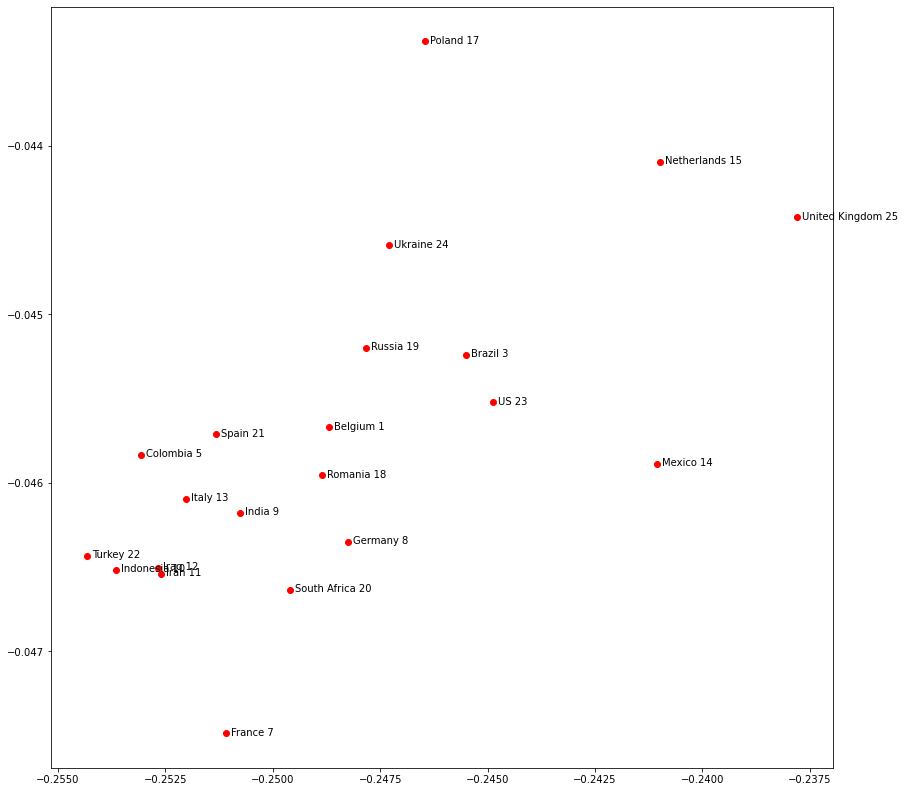

In [352]:
def mk_weeks(ii):
    WX = [ ref2weeks(ref) for ref in ref4big]
    #normalise
    return np.array([ x/np.linalg.norm(x) for x in WX]).astype(float)
    

ref4big = df[ df.iloc[:,-1] > 8000].index
idx = ref4big
WX = mk_weeks(idx)

if False:
    dirty = df.iloc[ref4big[WX.sum(axis=1)/np.sqrt(7) <.995],1].index

    idx = dirty.tolist()
    WX = mk_weeks(idx)


#calculate covariance
cov = np.dot(WX, WX.T) #- np.identity(len(WX))

#cov = -np.log(cov)

vp, vecs = np.linalg.eig(cov)

Xx = [ np.dot(vecs[0], u).real for u in cov]
Yx = [ .1*np.dot(vecs[1], u).real for u in cov]

fig, ax = plt.subplots()
fig.set_size_inches(14,14)
#ax.axis('off')


labels = df.iloc[idx,1]
kk = -1
for label , x, y  in zip(labels,Xx, Yx): 
    kk += 1
    if label.split()[0].lower() in ['ecuador', 'china', 'bolivia']: continue
    if label.lower() in ['peru', 'chile', 'argentina', 'philippines']: continue
    if label.lower() in ['sudan','oman','tunisia']: continue 
    if label[0] == 'K':continue
    
    label += ' ' + str(kk)
  
    ax.plot([x], [y], 'ro');
    ax.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,-2), # distance from text to points (x,y) : not same units
                 ha='left') # horizontal alignment can be left, right or center
    
    

In [299]:
ref4big = df[ df.iloc[:,-1] > 8000].index
ref4big
np.dot(WX, WX.T)

array([[ 1.        ,  0.95756053,  0.57844981,  0.80949169,  0.73783609,
         0.91225606,  0.93972952,  0.95655114,  0.95500012,  0.93074195,
         0.9534098 ,  0.96826644,  0.37900545,  0.39471221,  0.93174688,
         0.94585524,  0.92654615,         nan,  0.95367661,  0.71655198,
         0.92183051,  0.94460127,         nan,  0.93857138],
       [ 0.95756053,  1.        ,  0.70085527,  0.74811732,  0.69633407,
         0.95561555,  0.966725  ,  0.98901948,  0.99060091,  0.97997751,
         0.97173397,  0.99601577,  0.36026801,  0.44794139,  0.98339644,
         0.96590987,  0.98141803,         nan,  0.97106491,  0.83034907,
         0.96830198,  0.99603117,         nan,  0.98043715],
       [ 0.57844981,  0.70085527,  1.        ,  0.20412415,  0.70014004,
         0.66216428,  0.58213677,  0.65048851,  0.65167292,  0.65978034,
         0.67381312,  0.65978872, -0.28867513,  0.58871415,  0.71762788,
         0.53786513,  0.63439154,         nan,  0.64916635,  0.44654788,
  

In [353]:
cc = np.zeros_like(cov)
cc[(cov > .993)] = 1


cc[2] = 0
cc[:,2] =0

dict_keys([0, 1, 9, 10, 13, 15, 18, 19, 20, 24, 3, 14, 23, 25, 4, 5, 11, 12, 22, 6, 7, 8, 16, 17, 21])


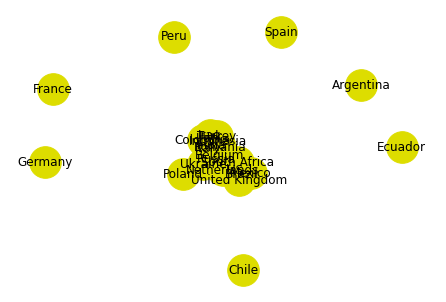

In [354]:
import networkx as nx

def show_graph(adjacency_matrix, my_labels=None):
    
    #rows, cols = np.where(adjacency_matrix == 1)
    #edges = zip(rows.tolist(), cols.tolist())
    edges = np.vstack( np.nonzero(adjacency_matrix) ).T
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    pos = nx.spring_layout(gr) 
    
    print(pos.keys())
    if my_labels == None:
        my_labels = {k : df.iloc[idx[k],1] for k in pos.keys()} 
    
        
    nx.draw(gr, pos, node_size=1000,
            connectionstyle='arc3, rad = 0.1',
            node_color='#dddd00',
            edge_color="r",
            labels=my_labels,
            with_labels=True)

show_graph(cc)

In [313]:
cc[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1.])

In [145]:
X, Y = np.where(cov > .997)
df.iloc[ ref4big[Y[np.where(X == 22)] ],1]
Y[np.where(X == 22)]

array([ 5,  9, 10, 11, 12, 13, 22])

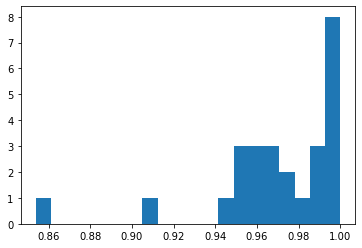

In [192]:
plt.hist(WX.sum(axis=1)/np.sqrt(7), bins = 20);

dirty = df.iloc[ref4big[WX.sum(axis=1)/np.sqrt(7) <.995],1].index

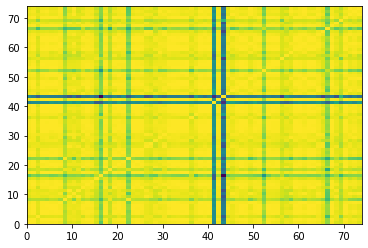

In [184]:
ref4big = df[ df.iloc[:,-1] > 1000 ].index.tolist()

WX = [ ref2weeks(ref) for ref in ref4big]
WX = np.array([ x/np.linalg.norm(x) for x in WX]).astype(float)
cov = np.dot(WX, WX.T)

plt.pcolor(cov);

(0.9898008117290604, 0.9695910560542206)

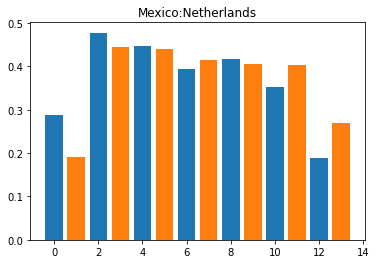

In [203]:
ref4big = np.array(ref4big)

tt = [14,15]
for k,ii in enumerate(tt):
    plt.bar(np.arange(k,7*len(tt),len(tt)), WX[ii]);
#plt.xticks()
plt.title(':'.join( df.iloc[ref4big[tt], 1]));
WX[tt[0]].dot(WX[tt[1]]), WX[tt[0]].sum()/np.sqrt(7)

In [204]:
np.linalg.norm(WX[15] - WX[14])

0.14282288521759837

In [290]:
pd.DataFrame( {'ref': np.arange(len(ref4big)), 'country':df.iloc[ref4big,1]} )

,ref,country
6,0,Argentina
23,1,Belgium
27,2,Bolivia
30,3,Brazil
55,4,Chile
89,5,Colombia
106,6,Ecuador
126,7,France
130,8,Germany
143,9,India


In [180]:
! ../.g


[master 302f546] web
 2 files changed, 497 insertions(+), 519 deletions(-)
 delete mode 100644 .stage_m2r_2020.tex.swp
 rewrite PROG/covid_pca.ipynb (86%)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 58.90 KiB | 11.78 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   869d8df..302f546  master -> master
